# Módulo 2️⃣ - Validação

## Importação e carregamento dos dados

In [98]:
# Importação de bibliotecas
## Processamento de dados
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

## Matplotlib e estilos para criação de gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [99]:
# Iremos trabalhar com dados de Pokémon (Extraídos da PokéAPI)
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}

In [100]:
# Criando dataframe
df_pokemon = pd.DataFrame(data)
print(df_pokemon)

          Nome  Tipo  Attack  Speed
0   Charmander  Fogo      52     65
1     Squirtle  Água      48     43
2    Growlithe  Fogo      70     60
3      Psyduck  Água      52     55
4       Vulpix  Fogo      50     65
5      Poliwag  Água      50     90
6       Magmar  Fogo      95     93
7    Tentacool  Água      40     70
8    Cyndaquil  Fogo      49     65
9     Totodile  Água      65     43
10     Torchic  Fogo      60     45
11      Mudkip  Água      70     40
12    Chimchar  Fogo      58     61
13      Piplup  Água      51     50
14    Fennekin  Fogo      61     72
15     Froakie  Água      56     71


In [101]:
# Transformando valores categóricos em números inteiros (isso permite a categorização dos dados pelo computador)
le = LabelEncoder()
df_pokemon['Tipo'] = le.fit_transform(df_pokemon['Tipo'])
print(df_pokemon)

          Nome  Tipo  Attack  Speed
0   Charmander     0      52     65
1     Squirtle     1      48     43
2    Growlithe     0      70     60
3      Psyduck     1      52     55
4       Vulpix     0      50     65
5      Poliwag     1      50     90
6       Magmar     0      95     93
7    Tentacool     1      40     70
8    Cyndaquil     0      49     65
9     Totodile     1      65     43
10     Torchic     0      60     45
11      Mudkip     1      70     40
12    Chimchar     0      58     61
13      Piplup     1      51     50
14    Fennekin     0      61     72
15     Froakie     1      56     71


In [102]:
# Separando dados de treinamento e teste
x_pokemon = df_pokemon[['Attack', 'Speed']].values
y_pokemon = df_pokemon['Tipo'].values

df_pokemon.head()

,Nome,Tipo,Attack,Speed
0,Charmander,0,52,65
1,Squirtle,1,48,43
2,Growlithe,0,70,60
3,Psyduck,1,52,55
4,Vulpix,0,50,65


In [103]:
# Particionando dados de treinamento
x_train, x_test, y_train, y_test = train_test_split(x_pokemon, y_pokemon, test_size=0.3, random_state=30)

## Criação de função para exibir dados

In [ ]:
# Função para visualização
def plot_model(model, x_train, y_train, x_test, y_test, title):
    # --- Geração da grade para o plano de fundo do gráfico ---
    x_min, x_max = [x_pokemon[:, 0].min() - 5, x_pokemon[:, 0].max() + 5]
    y_min, y_max = [x_pokemon[:, 1].min() - 5, x_pokemon[:, 1].max() + 5]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # --- Previsão e formatação dos dados para o plano de fundo ---
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(f'Z: {z}')
    z = z.reshape(xx.shape)

    # --- Plotagem dos dados ---
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['red', 'blue']) # [0] Fogo [1] Água
    plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # --- Elementos de treino com nome ---
    # Agora o loop itera sobre os dados de treino diretamente
    for i in range(len(x_train)):
        attack = x_train[i, 0]
        speed = x_train[i, 1]

        cor = 'red' if y_train[i] == 0 else 'blue'
        plt.scatter(attack, speed, c=cor, marker='o', edgecolors='k', s=100)
        
        # Procurando o nome no DataFrame original usando os valores de Attack e Speed.
        nome = df_pokemon.loc[(df_pokemon['Attack'] == attack) & (df_pokemon['Speed'] == speed), 'Nome']
        
        # O resultado de uma busca no dataframe é uma Series do Pandas. 
        # Acessamos o nome correto com o `.values[0]` para pegar o valor do array.
        if len(nome) > 0:
            plt.text(attack, speed, nome.values[0], fontsize=8)


    # --- Elementos de teste com nome ----
    for i in range(len(x_test)):
        attack = x_test[i, 0]
        speed = x_test[i, 1]

        cor = 'red' if y_test[i] == 0 else 'blue'
        plt.scatter(attack, speed, c=cor, marker='s', edgecolors='k', s=100)
        
        # Encontra o nome do Pokémon com base nas estatísticas
        nome = df_pokemon.loc[(df_pokemon['Attack'] == attack) & (df_pokemon['Speed'] == speed), 'Nome']

        if len(nome) > 0:
            plt.text(attack, speed, nome.values[0], fontsize=8)

    # --- Legenda ----
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
    ]

    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia do Treino: {model.score(x_train, y_train)}')
    print(f'Acurácia do Teste: {model.score(x_test, y_test)}') # Corrigido para x_test e y_test

## K-Fold

Z: [1 1 1 ... 0 0 0]


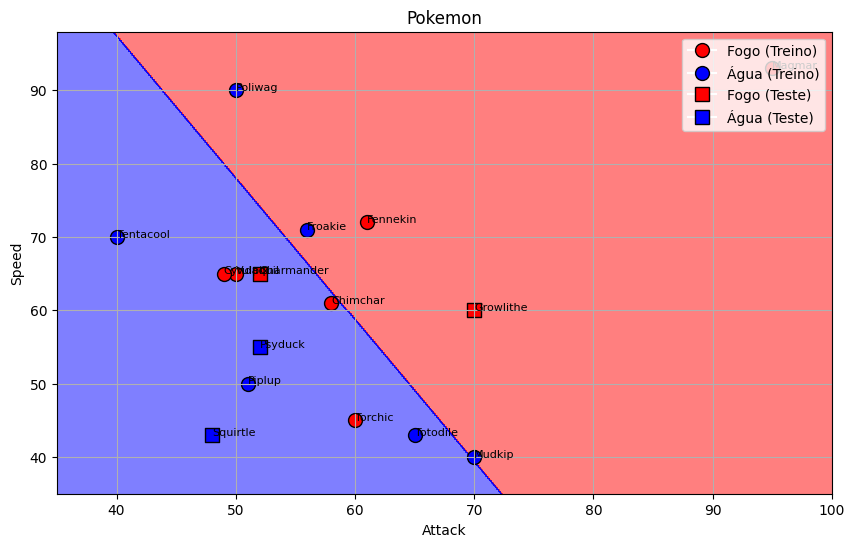

Acurácia do Treino: 0.4166666666666667
Acurácia do Teste: 0.75
Z: [1 1 1 ... 0 0 0]


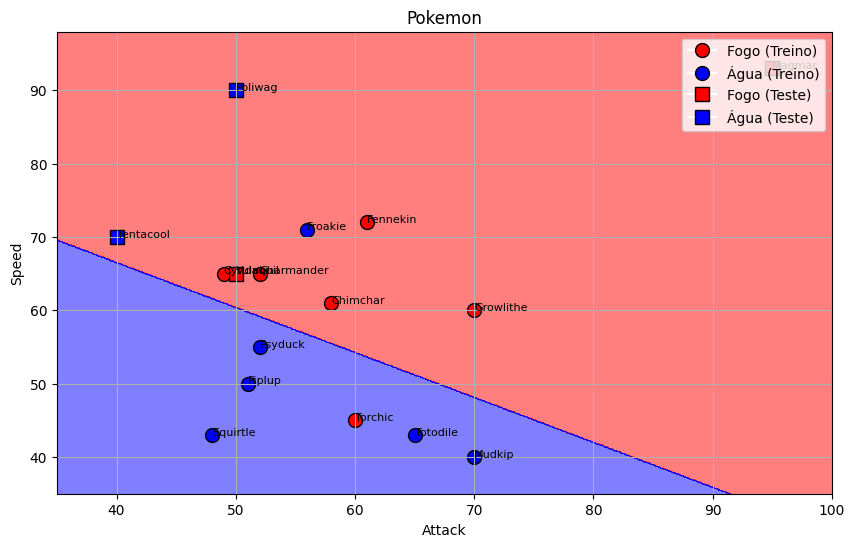

Acurácia do Treino: 0.8333333333333334
Acurácia do Teste: 0.5
Z: [1 1 1 ... 0 0 0]


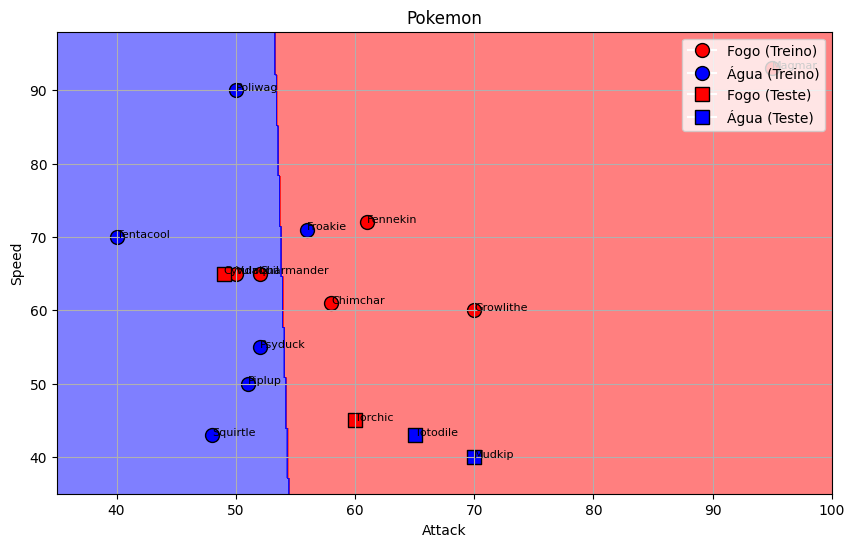

Acurácia do Treino: 0.75
Acurácia do Teste: 0.25
Z: [1 1 1 ... 0 0 0]


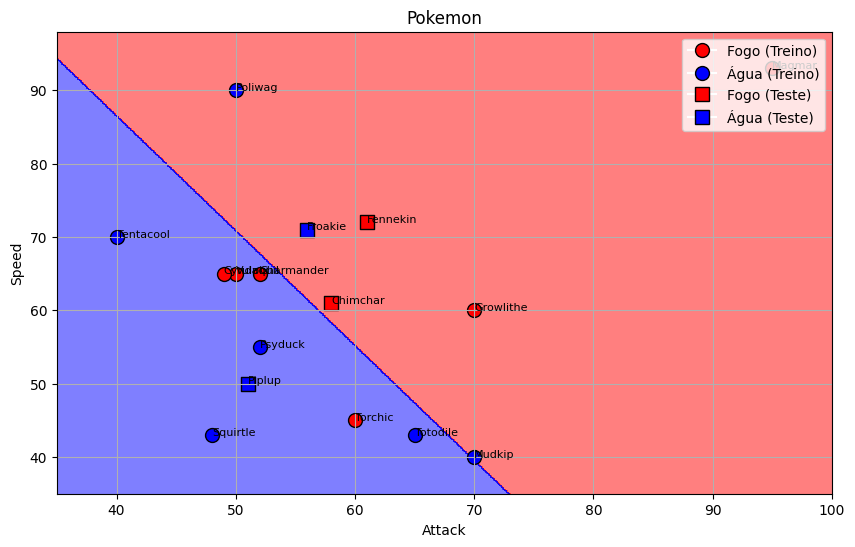

Acurácia do Treino: 0.5
Acurácia do Teste: 0.75


In [105]:
kf = KFold(n_splits=4)
for fold, (train_index, test_index) in enumerate(kf.split(x_pokemon)):
    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(model, 
        x_pokemon[train_index], 
        y_pokemon[train_index], 
        x_pokemon[test_index], 
        y_pokemon[test_index],
        title='Pokemon'
    )